# Explore IGLU singleturn dataset using Gridworld

[Gridworld](https://github.com/iglu-contest/gridworld) is a fast and scalable reinforcement learning environment for the IGLU competition at NeurIPS 2022. Besides all the functionalities of a reinforcement learning gym, it contains useful abstractions to iterate over the IGLU datasets. 

In this notebook, we show and example of how to load the singleturn dataset and explore its tasks.


## Set up

Install gridworld and seaborn if you haven't

In [15]:
import gridworld
import matplotlib.pyplot as plt
import seaborn

## Load dataset

This task may take some seconds the first time it's executed, as the dataset is been downloaded.

In [9]:
from gridworld.data import SingleTurnIGLUDataset

iglu_dataset = SingleTurnIGLUDataset(task_kwargs={'invariant': True})

In [10]:
print(f'Total structures: {len(iglu_dataset.tasks)}')
print(f'Total sessions: {len(sum(iglu_dataset.tasks.values(), []))}')

Total structures: 711
Total sessions: 3605


## Iterate over all tasks

`iglu_dataset.tasks` is an iterator over all available tasks. Keys are the task ids, and values are list of games played for that task id.

As an example, we will graphic the distribution of number of blocks in the initial and target grids.

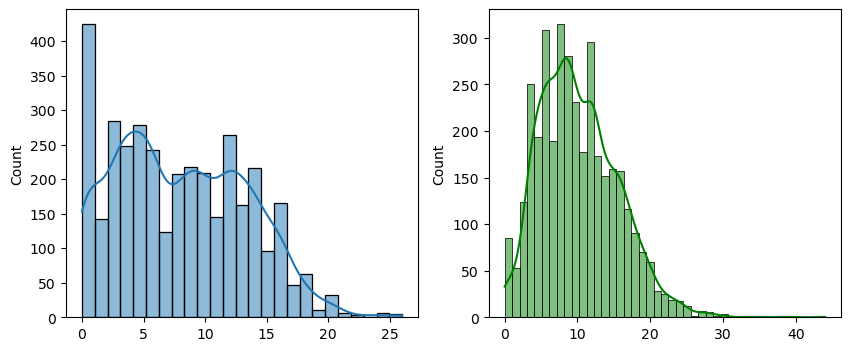

In [35]:
starting_grid_blocks = []
target_grid_blocks = []

for task_id, sessions in iglu_dataset.tasks.items():
    for session in sessions:
        starting_grid_blocks.append(len(session.starting_grid))
        target_grid_blocks.append(session.target_size)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
seaborn.histplot(starting_grid_blocks, ax=ax[0], kde=True)
seaborn.histplot(target_grid_blocks, ax=ax[1], color='green', kde=True);

## Explore the tasks

In [47]:
import random

task_id, task_sessions = random.choice(list(iglu_dataset.tasks.items()))
print(f'Random task selected {task_id}')
print(f'Total sessions for task {len(task_sessions)}')

Random task selected 14-c136/step-12
Total sessions for task 2


In [48]:
session = task_sessions[0]
print(f'Original number of blocks in world: {len(session.starting_grid)}')
print(f'Instruction given by architect: {session.last_instruction}')
print(f'Final number of blocks in world: {session.target_size}')

Original number of blocks in world: 11
Instruction given by architect: <Architect> Facing north destroy all yellow blocks then fill the gap between the purple blocks with red blocks.
Final number of blocks in world: 11


All sessions for the same task share the initial grid.

In [50]:
if len(task_sessions) > 1:
    print('Are starting grids equal?', task_sessions[0].starting_grid == task_sessions[1].starting_grid)

Are starting grids equal? True


## Visualize the world using matplotlib

In [52]:
%run -i ../../utils/grid_visualization.py

In [55]:
from gridworld.tasks import Tasks

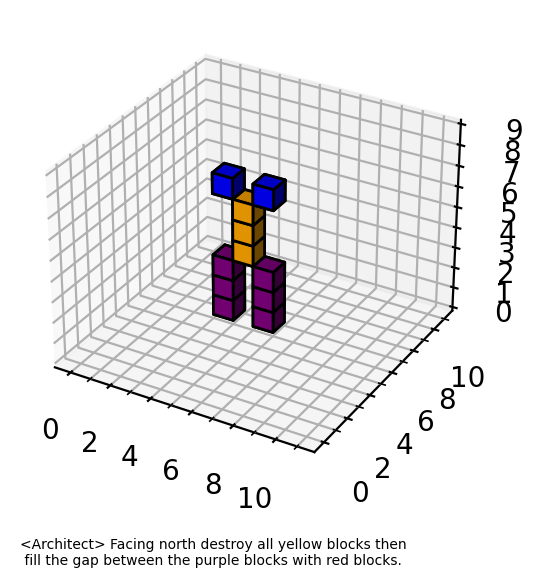

In [56]:
plot_grid(
    Tasks.to_dense(session.starting_grid), figsize=(3,3),
    text=break_str_to_lines(session.last_instruction), fontsize=5);

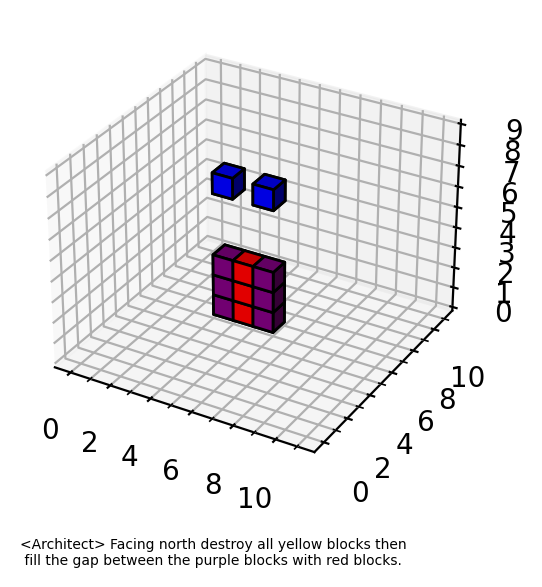

In [57]:
plot_grid(
    session.target_grid, figsize=(3,3),
    text=break_str_to_lines(session.last_instruction), fontsize=5);